In [1]:
# http://www.open3d.org/docs/latest/tutorial/Advanced/voxelization.html
# !pip3 install open3d

In [1]:
import sys
sys.path.append('/home/svdcvt/miniconda3/lib/python3.8/site-packages')
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import tinkhorn

In [3]:
data = np.load('FLOT/FLOT/flot/data/flownet3d/kitti_rm_ground/000004.npz')
data['gt'].shape, data['pos1'].shape, data['pos2'].shape

((48829, 3), (48829, 3), (49621, 3))

In [224]:
# nln = lambda x: x * np.log(x)
# n2 = lambda x: x ** 2
# x = np.logspace(0, 10, 1000)
# plt.semilogy(n2(x), label='$O(n^2)$')
# plt.semilogy(nln(x), label='$O(n\log(n))$')
# plt.xticks(np.logspace(0, 3, 11), [1, 10] + [f'$10^{{{i}}}$' for i in range(2, 11)])
# plt.legend()

In [2]:
from scipy.special import lambertw
func = lambda y: np.exp(lambertw(y**2))

In [27]:
x_range = np.logspace(0, 6, 7*99+8)
xticks = np.logspace(0, 6, 7, dtype=int)
xticklabels = ['$1^{}$', '$10^{}$'] + [f'$10^{{{i}}}$' for i in range(2, 7)]
fx = func(x_range).real

yticks = np.logspace(0, 12, 13, base=2, dtype=int) ** 3
yticklabels = [f'$2^{{{x}}}$' for x in np.linspace(0, 12, 13, dtype=int)*3]
yticklabels_ = [yticklabels[i] if i % 2 else ' ' for i in range(len(yticklabels))]
# yticklabels_

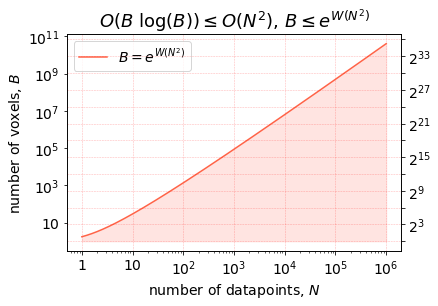

In [51]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(x_range, fx, label='$B = e^{{{W(N^2)}}}$', c='tomato')
ax1.fill_between(x_range, fx, 1, color='mistyrose')

ax1.set_title('$O(B\ \log(B)) \leq O(N^2)$, $B\leq e^{{{W(N^2)}}}$', fontsize=18)
ax1.set_ylabel('number of voxels, $B$', fontsize=14)
ax1.set_xlabel('number of datapoints, $N$', fontsize=14)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yticks(np.logspace(1, 11, 6))
ax1.set_yticklabels(['$10^{}$'] + [f'$10^{{{x}}}$' for x in range(3,12,2)],fontsize=14)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels, fontsize=14)
ax1.grid(axis='x', color='r', linestyle='--', linewidth=0.5, alpha=0.3)
ax1.legend(fontsize=14)

y1, y2 = ax1.get_ylim()
x1, x2 = ax1.get_xlim()

ax2 = ax1.twinx()
ax2.plot(x_range, fx, alpha=0)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels_, fontsize=14)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels, fontsize=14)
ax2.grid(axis='y', color='r', linestyle='--', linewidth=0.5, alpha=0.3)

plt.savefig('pres/zavisimost_nln_n2.pdf')
plt.show()

In [10]:
[1,4,11, 15, 110, 150, ], [2, 2**3, 2**6, 2**9, 2**12, 2**15,2**18, 2**21, 2**24, 2**27]

(10000000, 16777216)

In [88]:
((10**3) ** 2), 2**15*np.log(2**15), ((10**3) ** 2)/2, 2**18

(1000000, 340695.7021888243, 500000.0, 262144)

In [77]:
15**2

225

In [186]:
print('View Estimation Problem')
print('1D (circle)\n\t#operations=\t{}\t||\t#segments=\t{}\n\t#operations_t=\t{:.0f}\t||\t#segments_t=\t{}\
'.format(360**2, 360, (2**9)*np.log(2**9), f'{2**9} (2^9)'))
print('2D (sphere)\n\t#operations=\t{}\t||\t#segments=\t{}\n\t#operations_t=\t{:.0f}\t\t||\t#segments_t=\t{}\
'.format((360*360)**2, 360*360, (2**18)*np.log(2**18), f'{2**18} (2^9)^2'))

View Estimation Problem
1D (circle)
	#operations=	129600	||	#segments=	360
	#operations_t=	3194	||	#segments_t=	512 (2^9)
2D (sphere)
	#operations=	16796160000	||	#segments=	129600
	#operations_t=	3270679		||	#segments_t=	262144 (2^9)^2


In [5]:
def plotp3d(X, Y):
    fig = plt.figure(figsize=(10,10), )
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('3d cloudpints')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(X[:,0], X[:,1], X[:,2], s=5, alpha=0.5)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], s=5, alpha=0.5)
    plt.show()

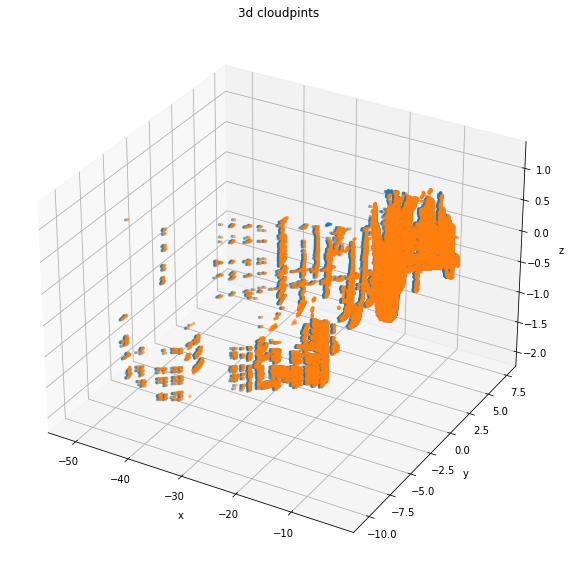

In [6]:
plotp3d(-data['pos1'], -data['pos2'])

In [8]:
# from utils import Arrow3D
# X, Y = data['pos1'], data['pos2']

# fig = plt.figure(figsize = (10,10))
# fig.suptitle('toeplitz sinkhorn')
# betas_ = [0.2]
# axes = []
# bin_size=32
# for i, beta_ in enumerate(betas_):
#     K, a, b, bins, x, y = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=bin_size, beta=beta_, max_iter=1000, 
#                                                early_stopping=True, plot=False, verbose=True)
# #     C_bins = cdist(bins, bins)
#     P = np.dot(np.dot(np.diag(a), K), np.diag(b))
    
#     xbins, ybins = bins[x>0], bins[y>0]

# #     hat_xbins = bins[mapping(P, C_bins)][x>0]
    
#     ax = fig.add_subplot(1, 1, i + 1, projection='3d')
#     ax.set_title(f'beta={beta_:1.4}')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     ax.scatter(xbins[:,0], xbins[:,1], xbins[:,2], s=x[x>0]*1000, label='source')
#     ax.scatter(ybins[:,0], ybins[:,1], ybins[:,2], s=y[y>0]*1000, label='target')
# #     ax.scatter(hat_xbins[:,0], hat_xbins[:,1], hat_xbins[:,2], s=x[x>0]*1000, marker='o', label='source corresponding image')
# #     for j in range(len(xbins)):
# #         arrow = Arrow3D([xbins[j, 0],  hat_xbins[j, 0]], [xbins[j, 1],  hat_xbins[j, 1]], 
# #                 [xbins[j, 2],  hat_xbins[j, 2]], mutation_scale=10, 
# #                 lw=0.5, arrowstyle="-|>", color="k", alpha=0.5)
# #         ax.add_artist(arrow)
# ax.legend(bbox_to_anchor=(1., 1.01))
# plt.show()

In [44]:
X, Y = data['pos1'], data['pos2']
beta_ = 0.2
bin_size = 2**15
K, a, b, bins, x, y = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=bin_size, beta=beta_, max_iter=100, 
                                               early_stopping=True, plot=False, verbose=True, store_full=False)

MemoryError: Unable to allocate 256. TiB for an array with shape (32768, 32768, 32768) and data type float64

In [30]:
from scipy.spatial.distance import cdist
from scipy import sparse
C_bins = cdist(bins, bins)
K_full = np.exp(-C_bins  / beta_)
K_full_ = sparse.csr_matrix(K_full)

In [31]:
diag_a = sparse.diags([a], [0])
diag_b = sparse.diags([b], [0])

In [33]:
da, db = np.diag(a), np.diag(b)

In [39]:
import torch
da_, db_ = torch.Tensor(da)[None], torch.Tensor(db)[None]
K_ = torch.Tensor(K_full)[None]

In [32]:
%timeit (diag_a.dot(K_full_)).dot(diag_b)

16 ms ± 864 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit a.dot(K_full).dot(db)

15.8 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%timeit torch.matmul(torch.matmul(da_, K_), db_)

1.71 s ± 30.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
mapping = lambda gamma, c_t: np.argmin((gamma[:, None, :] * c_t).sum(-1), 1)

In [15]:
map_id = mapping(P_.toarray(), C_bins)

MemoryError: Unable to allocate 512. GiB for an array with shape (4096, 4096, 4096) and data type float64

In [17]:
P_

<4096x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 135000 stored elements in Compressed Sparse Row format>

In [21]:
4096*4096

16777216

In [12]:
xyz = np.random.rand(1000, 3)

In [13]:
paired_d = abs((xyz[:, None] - xyz[None, :])).reshape(-1, 3) 
paired_d = paired_d[paired_d != [ 0.,  0.,  0.]].reshape(-1, 3)
vsize = paired_d.min(-2).min()
print(vsize)

6.546662606465858e-07


In [43]:
grid, step = np.linspace(np.min(xyz, 0), np.max(xyz, 0), 2**14 + 1, retstep=True, dtype=np.float16) # [D, B] n+m +b
mesh = np.meshgrid(*centers(grid.T), indexing='xy', copy=False) 
# bins = np.array(mesh).reshape(3, -1).T

In [41]:
mesh[0].shape

(16384, 16384, 16384)

In [105]:
ndim = len(xi)


s0 = (1,) * ndim
print(s0)
print(s0[:0] + (-1,) + s0[0 + 1:])
print(s0[:1] + (-1,) + s0[1 + 1:])
print(s0[:2] + (-1,) + s0[2 + 1:])

output = [np.asanyarray(x).reshape(s0[:i] + (-1,) + s0[i + 1:])
          for i, x in enumerate(xi)]

print([x.shape for x in output])

# switch first and second axis
output[0].shape = (1, -1) + s0[2:]
output[1].shape = (-1, 1) + s0[2:]
print([x.shape for x in output])

# Return the full N-D matrix (not only the 1-D vector)
output = np.broadcast_arrays(*output, subok=True)

print(output.shape)


(1, 1, 1)
(-1, 1, 1)
(1, -1, 1)
(1, 1, -1)
[(3, 1, 1), (1, 3, 1), (1, 1, 3)]
[(1, 3, 1), (3, 1, 1), (1, 1, 3)]


AttributeError: 'list' object has no attribute 'shape'

In [86]:
(centers(grid)[:, :, None, None] * np.ones((1, 1, 3, 3))).reshape(3, -1).T

array([[0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.16831009],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.49780841],
       [0.82915221, 0.8310627 , 0.82730672],
       [0.82915221, 0.8310627 , 0.82730672],
       [0.82915221, 0.8310627 , 0.82730672],
       [0.82915221, 0.8310627 , 0.82730672],
       [0.

AttributeError: 'list' object has no attribute 'shape'

In [82]:
np.array(mesh).reshape(3, -1).T

array([[0.16776354, 0.16943017, 0.16831009],
       [0.16776354, 0.16943017, 0.49780841],
       [0.16776354, 0.16943017, 0.82730672],
       [0.49845787, 0.16943017, 0.16831009],
       [0.49845787, 0.16943017, 0.49780841],
       [0.49845787, 0.16943017, 0.82730672],
       [0.82915221, 0.16943017, 0.16831009],
       [0.82915221, 0.16943017, 0.49780841],
       [0.82915221, 0.16943017, 0.82730672],
       [0.16776354, 0.50024644, 0.16831009],
       [0.16776354, 0.50024644, 0.49780841],
       [0.16776354, 0.50024644, 0.82730672],
       [0.49845787, 0.50024644, 0.16831009],
       [0.49845787, 0.50024644, 0.49780841],
       [0.49845787, 0.50024644, 0.82730672],
       [0.82915221, 0.50024644, 0.16831009],
       [0.82915221, 0.50024644, 0.49780841],
       [0.82915221, 0.50024644, 0.82730672],
       [0.16776354, 0.8310627 , 0.16831009],
       [0.16776354, 0.8310627 , 0.49780841],
       [0.16776354, 0.8310627 , 0.82730672],
       [0.49845787, 0.8310627 , 0.16831009],
       [0.

In [2]:

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

In [4]:
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,
                                                            voxel_size=vsize)

In [6]:
(voxel_grid.get_max_bound() - voxel_grid.get_min_bound()) / vsize

array([12478., 12483., 12433.])

In [11]:
(voxel_grid.get_max_bound() * 2) / vsize

array([25015.78124299, 25066.17020976, 24954.57168703])

7.951028274499894e-05

In [15]:
voxel_grid.get_max_bound(), voxel_grid.get_min_bound()

(array([0.99450592, 0.99650914, 0.99207253]),
 array([0.00237661, 0.00398228, 0.00352118]))

In [21]:
xyz.max(-2) + vsize, xyz.min(-2) + vsize

(array([0.99457889, 0.99655035, 0.99213539]),
 array([0.00249588, 0.00410155, 0.00364045]))

In [8]:
voxel_grid.origin

array([0.00237661, 0.00398228, 0.00352118])

In [ ]:
# voxel_grid.create_dense(voxel_grid.origin, color=[0,0,0], voxel_size=vsize, width=x,height=y,depth=z)